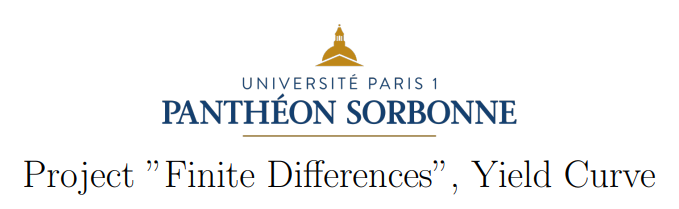

## Koudadim Olivier TRAORE --- Student Number: 12403019

# Introduction

The objective of this assignment is to solve the Black-Scholes partial differential equation for different payoffs using the so-called explicit finite
difference method.

# 1. Black-Scholes Equation

## 1.1 The equation

In a B&S framework, the price of a given underlying is solution of:

$$
\left\{\begin{array}{l}
d X_{t}=X_{t}\left(r d t+\sigma d W_t \right) \\
X_{0}=X_{0}
\end{array}\right.
$$

This diffusion is characterized by its infinitesimal linear generator:


$$
f(t, x) \longmapsto \mathscr{L}^{X} f=\frac{\partial f}{\partial t}+r x \frac{\partial f}{\partial x}+\frac{1}{2} \sigma^{2} x^{2} \frac{\partial^{2} f}{\partial x^{2}}
$$

In that context, the price of a European option with payoff $G(x)$ at date $T$ written on that underlying can be obtained as a function $f (t, X_t)$, solution of the following PDE:


$$
P(\mathscr{L}, G)=\left\{\begin{array}{l}
\mathscr{L} f:=\mathscr{L}^{X} f-r f=0 \\
f(T, x)=G(x)
\end{array}\right.
$$

## 1.2 Change of variable

Let $Y_t := ln (X_t)$ the logarithm of the price of the underlying and let $ h(t, Y_t) := f (t, ln (X_t))$ the price of the option expressed as a function of the logarithm of the price. Show that $h$ is the solution of:

$$
\left\{\begin{array}{l}
\dfrac{\partial h}{\partial t}+\left(r-\dfrac{1}{2} \sigma^{2}\right) \dfrac{\partial h}{\partial x}+\frac{1}{2} \sigma^{2} \dfrac{\partial^{2} h}{\partial x^{2}}=r h \\
h(t, x)=G\left(e^{x}\right) .
\end{array}\right. \\
$$

$$
\begin{aligned}
 d h\left(t, Y_{t}\right) & \equiv d f\left(t, \ln X_{t}\right) \\
& =\frac{\partial f}{\partial t}\left(t, Y_{t}\right) dt + \frac{\partial f}{\partial x}\left(t, Y_{t}\right)  \times  \frac{d Y_{t}}{d x} d X_{t} + \frac{1}{2} \frac{\partial}{\partial x}\left(\frac{\partial f}{\partial x}\left(t, Y_{t}\right)   \times \frac{d Y_{t}}{d x}\right) d\langle X, X\rangle_{t} \\
& = \frac{\partial f}{\partial t}\left( t, Y_{t} \right) d t + \frac{\partial f}{\partial x}\left(t, Y_{t}\right) \cdot \frac{d Y_{t}}{d x} d X_{t} + \frac{1}{2} \left\{ \frac{\partial^{2} f}{\partial x^{2}} \left(t, Y_{t}\right) \cdot \frac{d Y_{t}}{d x} \cdot \frac{d Y_{t}}{d x} + \frac{\partial f}{\partial x}\left(t, Y_{t}\right) \frac{d^{2} Y_{t}}{d x^{2}} \right\} d\langle X, X \rangle_{t}
\end{aligned}
$$

Given that 
$$
d \langle X, X \rangle_{t} =\sigma^{2} X_{t}^{2} d t ; \quad \text{ and } \quad Y_{t} = ln\left(X_t\right) \quad \Rightarrow \quad \dfrac{d Y_{t}}{d x}=\dfrac{1}{X_{t}} ; \quad \frac{d^{2} Y_{t}}{d x^{2}}=\dfrac{-1}{X_{t}^{2}} \\
$$
One has:
$$
\begin{aligned}
d h\left(t, Y_{t}\right) & = \frac{d f}{d t}\left(t, Y_{t}\right) d t+\frac{d f}{d x}\left(t, Y_{t}\right)\left(r d t+\sigma d X_{t}\right) +\frac{1}{2}\left\{\dfrac{d f}{d x^{2}}\left(t, Y_{t}\right) \dfrac{1}{X_{t}^{2}}+\dfrac{d f}{d x}\left(t, Y_{t}\right)\left(-\dfrac{1}{X_{t}^{2}}\right)\right\} \sigma^{2} X_{t}^{2} d t \\
& = \sigma \dfrac{\partial h}{\partial x}\left(t, Y_{t}\right) d W_{t} + \left\{ \dfrac{\partial h}{\partial t}\left(t, Y_{t}\right)+\left(r-\frac{1}{2} \sigma^{2}\right) \dfrac{\partial h}{\partial x}\left(t, Y_{t}\right) + \frac{1}{2} \sigma^{2} \frac{\partial^{2} h}{\partial x^{2}}\left(t, Y_{t}\right) \right\} d t
\end{aligned}
$$

From this last equality, we can deduce that the dynamics of $Y_t = ln\left(X_t\right)$ is characterized by its infinitesimal generator defined as follows:

$$
h(t, \ln x) \mapsto \mathscr{L}^{Y} h(t, \ln x)=\frac{\partial h}{\partial t}+\left(r-\frac{\sigma^{2}}{2}\right) \frac{\partial h}{\partial x}+\frac{1}{2} \sigma^{2} \frac{\partial^{2} h}{\partial x^{2}}
$$

Moreover, if $G(X_T)$ is the payoff of a European option, then at maturity $T$:
$$
G\left(X_{T}\right):=h\left(t, \ln X_{T}\right) = h(T, x) \Leftrightarrow \ln x_{T}=x \Leftrightarrow X_{T}=e^{x}
$$ 
So $h(T, x)=G\left(e^{x}\right)$.

Thus $h$ is solution to the following PDE:


$$
\left\{\begin{array}{l}
\dfrac{\partial h}{\partial t}+\left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{\partial h}{\partial x}+\dfrac{\sigma^{2}}{2} \dfrac{\partial^{2} h}{\partial x^{2}}=r h \\
h(T, x)=G\left(e^{x}\right)
\end{array}\right.
$$



## 1.3 Euler scheme and discretization

The domain of $f$ is $[0, T] \times \mathbf{R}^{+}$ but we are only interested in computing the
solutions in a domain around the initial price X0. So the first step is to
define Xmin and Xmax, the boundaries of the interval on which we will look
for the solution. This sub domain is then discretized as:

* Time: $\tau=\left\{t_0=0, \ldots, t_j=j \delta t, \ldots, t_{n_{\text {time }}}=T\right\}$ with $\delta t=T / n_{\text {time }}$
* Space: $\chi=\left\{x_0=X_{\text {min }}, \ldots, x_i=x_{\min }+i \delta x, \ldots, x_{n_{\text {space }}}=X_{\max }\right\}$ with $\delta x=\frac{x_{\text {max }}-x_{\text {min }}}{n_{\text {space }}}$. We denote $\dot{\chi}$ the set $\chi$ without its boundaries $X_{\text {min }}$ and $X_{\max }$.
Define $h(j, i) \equiv h\left(t_j, x_i\right)$. Approximate the partial derivatives using $h(j, i)$ values on $\stackrel{\circ}{\chi}$ and show that \\

$\forall x_i \in \stackrel{\circ}{\chi}:$

$$
\begin{aligned}
h(j, i) & =h(j+1, i)+\delta t \times \left[\frac{1}{2} \sigma^2 \frac{h(j+1, i+1)-2h(j+1, i) + h(j+1, i-1)}{(\delta x)^2} +\left(r-\frac{1}{2} \sigma^2\right) \frac{h(j+1, i+1)-h(j+1, i-1)}{2 \delta x} - r h(j+1, i) \right ] +o(1)
\end{aligned}
$$

Let consider the partial derivatives of $h$ with respect to $t$, and $x$ at $(x_i, t_{j+1}); \quad h(x_i, t_{j+1}) \equiv h(j+1, i) \forall (j,i) \in \left\{0, \cdots, n_{time} - 1   \right\} \times \left\{1, \cdots, n_{space}-1  \right\} $:

$$
\begin{aligned}
& \dfrac{\partial h}{\partial t} (j+1, i) = \dfrac{h(j+1, i) - h(j, i)}{\delta t} + O( \delta t) \quad \quad  \text{ (Backward difference)} \\
& \dfrac{\partial h}{\partial x} (j+1, i) = \dfrac{h(j+1, i+1) - h(j+1, i-1)}{2 \delta x} + O( \delta x ) \quad \quad  \text{ (Central difference)} \\
&\dfrac{\partial^2 h}{\partial x^2} (j+1, i) = \dfrac{ \dfrac{\partial h}{\partial x} (j+1, i) - \dfrac{\partial h}{\partial x} (j+1, i-1)}{\delta x} + O(( \delta x )^2) \\
\text{So: }\\
& \begin{aligned}
\dfrac{\partial^2 h}{\partial x^2} (j+1, i) & = \frac{\dfrac{h(j+1, i+1) - h(j+1, i)}{\delta x} - \dfrac{h(j+1, i) - h(j+1, i-1)}{\delta x}}{\delta x} \\
& = \dfrac{h(j+1, i+1) - 2 h(j+1, i) + h(j+1, i-1)}{(\delta x)^2}
\end{aligned}
\end{aligned}
$$


It comes that:

$$
\dfrac{\partial h}{\partial t}(j+1, i) + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{\partial h}{\partial x}(j+1, i) + \dfrac{\sigma^{2}}{2} \dfrac{\partial^{2} h}{\partial x^{2}}(j+1, i) - r h(j+1, i) = 0 \\
$$
By plugging the partial dérivatives approximations defined above into the latter PDE, we get:

$$
\dfrac{h(j+1, i) - h(j, i)}{\delta t} + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(j+1, i+1) - h(j+1, i-1)}{2 \delta x} + \dfrac{\sigma^{2}}{2} \dfrac{h(j+1, i+1) - 2 h(j+1, i) + h(j+1, i-1)}{(\delta x)^2} - r h(j+1, i) + O (\delta t, \delta x, (\delta x)^2) = 0 \\
\Rightarrow \dfrac{h(j, i)}{\delta t} = \dfrac{h(j+1, i)}{\delta t} + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(j+1, i+1) - h(j+1, i-1)}{2 \delta x} + \dfrac{\sigma^{2}}{2} \dfrac{h(j+1, i+1) - 2 h(j+1, i) + h(j+1, i-1)}{(\delta x)^2} - r h(j+1, i) + O (\delta t, \delta x, (\delta x)^2) \\
\Rightarrow h(j, i) = h(j+1, i) + \delta t \times \left[ \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(j+1, i+1) - h(j+1, i-1)}{2 \delta x} + \dfrac{\sigma^{2}}{2} \dfrac{h(j+1, i+1) - 2 h(j+1, i) + h(j+1, i-1)}{(\delta x)^2} - r h(j+1, i) \right] + O ((\delta t)^2, \delta t \delta x, \delta t (\delta x)^2)
$$

By rearranging the terms of the last equality, we obtain:

$\forall (j,i) \in \left\{0, \cdots, n_{time} - 1   \right\} \times \left\{1, \cdots, n_{space}-1  \right\}$

$$
h(j, i) = a_i h(j+1, i-1) + b_i h(j+1, i) + c_i h(j+1, i+1) + O ((\delta t)^2, \delta t \delta x, \delta t (\delta x)^2)
$$
Where:
$$
\begin{aligned}
& a_i = \delta t \left[ \dfrac{-1}{2 \delta x} \left(r - \dfrac{\sigma^2}{2} \right) + \dfrac{\sigma^2}{2 (\delta x)^2}  \right]\\
& b_i = 1 - \delta t \left( r + \dfrac{\sigma^2}{(\delta x)^2} \right) \\
& c_i = \delta t \left[ \dfrac{1}{2 \delta x} \left(r - \dfrac{\sigma^2}{2} \right) + \dfrac{\sigma^2}{2 (\delta x)^2}  \right]
\end{aligned}
$$

## 1.4 Boundary conditions

Let make the assumption that $ \forall j, \dfrac{\partial^2 h}{\partial x^2}(t_j, x_0) = \dfrac{\partial^2 h}{\partial x^2}(t_j, x_{n_{space}}) = 0$ \\

So $\forall j \in \left\{0, \cdots, n_{time} \right\}$:

* For $i = 0$: 

$$
\dfrac{\partial h}{\partial t}(t_{j+1}, x_0) + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{\partial h}{\partial x}(t_{j+1}, x_0) + \dfrac{\sigma^{2}}{2} \dfrac{\partial^{2} h}{\partial x^{2}}(t_{j+1}, x_0) - r h(t_{j+1}, x_0) = 0 
$$

$$
\dfrac{\partial h}{\partial t}(t_{j+1}, x_0) + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{\partial h}{\partial x}(t_{j+1}, x_0) - r h(t_{j+1}, x_0) = 0 \quad \text{ since } \quad \dfrac{\partial^{2} h}{\partial x^{2}}(t_{j+1}, x_0) = 0 
$$

By plugging the corresponding partial dérivatives approximations into the the PDE for $i=0$, we get

$$
\dfrac{h(t_{j+1}, x_0) - h(t_{j}, x_0)}{\delta t} + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(t_{j+1}, x_1) - h(t_{j+1},x_{-1})}{2 \delta x} - r h(t_{j+1}, x_0) + O (\delta t, \delta x) = 0
$$

Or equivalently:

$$
\dfrac{h(j+1, 0) - h(j, 0)}{\delta t} + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(j+1, 1) - h(j+1, -1)}{2 \delta x} - r h(j+1, 0) + O (\delta t, \delta x) = 0
$$

* For $i = n_{space}$

$$
\dfrac{\partial h}{\partial t}(t_{j+1}, x_{n_{space}}) + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{\partial h}{\partial x}(t_{j+1}, x_{n_{space}}) + \dfrac{\sigma^{2}}{2} \dfrac{\partial^{2} h}{\partial x^{2}}(t_{j+1}, x_{n_{space}}) - r h(t_{j+1}, x_{n_{space}}) = 0
$$

$$
\dfrac{\partial h}{\partial t}(t_{j+1}, x_{n_{space}}) + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{\partial h}{\partial x}(t_{j+1}, x_{n_{space}}) - r h(t_{j+1}, x_{n_{space}}) = 0 \quad \text{ since } \quad \dfrac{\partial^{2} h}{\partial x^{2}}(t_{j+1}, x_{n_{space}}) = 0 
$$

By plugging the corresponding partial dérivatives approximations into the the PDE for $i={n_{space}}$, we get

$$
\dfrac{h(t_{j+1}, x_{n_{space}}) - h(t_{j}, x_{n_{space}})}{\delta t} + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(t_{j+1}, x_{n_{space}+1}) - h(t_{j+1},x_{{n_{space}}-1})}{2 \delta x} - r h(t_{j+1}, x_{n_{space}}) + O (\delta t, \delta x) = 0
$$

Or equivalently:

$$
\dfrac{h(j+1, {n_{space}}) - h(j, {n_{space}})}{\delta t} + \left(r-\dfrac{\sigma^{2}}{2}\right) \dfrac{h(j+1, {n_{space}+1}) - h(j+1, {n_{space}-1})}{2 \delta x} - r h(j+1, {n_{space}}) + O (\delta t, \delta x) = 0
$$

By rearranging the terms in the two cases, we have:
$\forall j \in \left\{0, \cdots, n_{time} \right\}$

$$
\left\{\begin{array}{l}
h(j, 0) = a_0 h(j+1, -1) + b_0 h(j+1, 0) + c_0 h(j+1, 1) + O ((\delta t)^2, \delta t \delta x) \\
h(j, n_{space}) = a_{n_{space}} h(j+1, {n_{space}-1}) + b_{n_{space}} h(j+1, {n_{space}}) + c_{n_{space}} h(j+1, {n_{space}+1}) + O ((\delta t)^2, \delta t \delta x)
\end{array}\right.
$$

Where:

$$
\begin{aligned}
& a_0 = a_{n_{space}} :=\delta t \left[ \dfrac{-1}{2 \delta x} \left(r - \dfrac{\sigma^2}{2} \right) \right]\\
& b_0 = b_{n_{space}} := 1 - r \delta t \\
& c_0 = c_{n_{space}} := \delta t \left[ \dfrac{1}{2 \delta x} \left(r - \dfrac{\sigma^2}{2} \right) \right]
\end{aligned}
$$

For the implementation, we will consider 0 at the place of $h(j+1, -1)$ and $ h(j+1, {n_{space}+1}) $ given that their values are unknown

# 2. Implementation 

## 2.1 Benchmarks

We are tasked to write a function which computes the exact Black and Scholes price of a European call or put option.

Instead of writting a function for close-form BS options prices, we find better to write at the end of this notebook, a global class that contains the methods:
* \_\_init\_\_: that initialzes the parameters
* \_calculate\_d1\_d2: that calculates the values of $d_1$ and $d_2$
* forward_price: evaluate the forward price
* call_put_benchmark: calculating benchmark options' prices 
* call\_put\_finite\_diff\_approx: implements the finite difference method explained above to value European call and put
* We will also define in that class, a method to calculate a binary cash-or-nothing call option value,and its delta and gamma sentivities

#### Reminder

Let denote:
* $C(S,t)$ is the price of a European call option and
* $P(S,t)$ is the price of a European put option.
* $T$ is the time of option expiration.
* $\tau =T-t$ is the time until maturity: 
* $K$ is the strike price of the option, also known as the exercise price.
* $D= e^{-r \tau }$ the discount factor; 
* $F= e^{r \tau }S=  \dfrac{S}{D} $ the forward price of the underlying asset
* $N$ denotes the standard normal cumulative distribution function:

The arbitrage-free price (Benchmark) implied by the Black–Scholes model is:

$$
\begin{aligned}
& C\left(S_{t}, t\right)=e^{-r(T-t)}\left[F N\left(d_{1}\right)-K N\left(d_{2}\right)\right] \quad ; \quad P\left(S_{t}, t\right)=e^{-r(T-t)}\left[K N\left(-d_{2}\right)-F N\left(-d_{1}\right)\right]  \\ 
& F=S_{t} e^{(r-q)(T-t)} ; \quad d_{1}=\frac{1}{\sigma \sqrt{T-t}}\left[\ln \left(\frac{S_{t}}{K}\right)+\left(r+\frac{1}{2} \sigma^{2}\right)(T-t)\right] ; \quad d_{2}=d_{1}-\sigma \sqrt{T-t}
\end{aligned}
$$

$$
N(x)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{-x^{2} / 2} d z . \quad N^{\prime}(x)=\frac{d N(x)}{d x}=\frac{1}{\sqrt{2 \pi}} e^{-x^{2} / 2}
$$



A Cash-or-nothing call is a binary option that pays out one unit of cash if the spot is above the strike at maturity.

Its price is given in the framework of BS by:

$$
CashNothingCall(T,t) = e^{ -r(T-t) } N(d_2)
$$

Its delta and gamma expressions are given by:
$$
\Delta = \frac{\partial C}{\partial X} = e^{-r(T - t)} \cdot \frac{N'(d_2)}{X \cdot \sigma \sqrt{T - t}}
$$

$$
\Gamma = \frac{\partial^2 C}{\partial X^2} = e^{-r(T - t)} \cdot \frac{d_2 \cdot N'(d_2)}{X^2 \cdot \sigma^2 (T - t)}
$$

## 2.2 Solving the PDE

It can be shown that the previous scheme converges iff:
$$
C:= \dfrac{\sigma^2 \delta t}{(\delta x)^2} < 1
$$

The practical definition $ \chi $ involves a choice for $X_{min}$ and $X_{max}$. 

We can define:

$$
X_{min} := \left( r - \dfrac{\sigma^2}{2} \right) T - k \sigma \sqrt{T} \text{  and  }
X_{max} := \left( r - \dfrac{\sigma^2}{2} \right) T + k \sigma \sqrt{T}
$$

where $k$ is typically 3 or 4.

The choice of $( X_{\min})$ and $( X_{\max})$ is crucial in defining the computational domain for solving the PDE numerically, as it determines the boundaries of the space grid. Let us analyze why the given definition provides a good candidate:

* The term $\left( r - \frac{1}{2} \sigma^2 \right)T$ accounts for the expected drift of the logarithm of the underlying price under the risk-neutral measure
* The term $\pm k \sigma \sqrt{T}$ corresponds to the variation in the underlying price due to volatility. This term ensures the domain extends far enough to capture the majority of the distribution of the underlying asset price.

We also know that:

For a log-normal distribution (typical for asset prices), most of the probability mass lies within $ k = 3 $ or $ k = 4 $ standard deviations around the mean. This is derived from properties of the normal distribution:
* Approximately 99.7\% of the probability lies within $\pm 3\sigma $ of the mean.
* Extending this to $ k = 4 $ provides even greater confidence, ensuring that boundary effects are minimized.

So, Properly chosen $ x_{\min} $ and $ x_{\max} $ ensure the solution is accurate without requiring excessively large computational grids, and at the boundaries $ x_{\min}$ and $ x_{\max} $, boundary conditions such as the payoff function at maturity or absorbing conditions are applied. If the domain is too narrow, critical information about the option value outside this range may be lost, leading to inaccuracies.

Thus, it come that larger values of $ k $ increase the computational domain, potentially improving accuracy but at the cost of more computation. For $ k = 3 $ or $ k = 4 $, the domain balances accuracy and computational efficiency, making it a practical choice for most applications and consequently, ours.

## 2.3 Implementation

The python global class described in section 2.1 is named BSMOptionsValuation and can be implemented as follow:

In [367]:
import numpy as np
from numpy import log, exp, sqrt
from scipy import stats
from typing import Tuple
from numpy import zeros
from pandas import DataFrame

class BSMOptionsValuation:
    
    """
    Valuation of European call options in Black-Scholes-Merton Model (incl. dividend)
    Attributes
    ==========
    Xt: float
        initial (current) stock/index level
    K: float
        strike price
    t: float
        current time view as the initial time. it is generally equal to 0
    T: float
        time to maturity (in year fractions)
    r: float
        constant risk-free short rate
        assume flat term structure
    sigma: float
        volatility factor in diffusion term
    ==========
    """

    def __init__(self, Xt: float, K: float, T: float, r: float, sigma: float, t: float = 0.0):
        assert sigma >= 0, 'volatility cannot be less than zero'
        assert Xt >= 0, 'initial stock price cannot be less than zero'
        assert 0 <= t <= T, 'the current time t should not be negative nor above the maturity T'
        assert T >= 0, 'time to maturity cannot be less than zero'

        self.Xt = float(Xt)
        self.K = float(K)
        self.T = float(T)
        self.r = float(r)
        self.sigma = float(sigma)
        self.t = float(t)
        
        self._tau = self.T - self.t
        self._D = exp(-self.r * self._tau)
        self._d1, self._d2 = self._calculate_d1_d2()

    def _calculate_d1_d2(self):
        d1 = ((log(self.Xt / self.K) + (self.r + 0.5 * self.sigma ** 2) * self._tau) / (
                self.sigma * sqrt(self._tau)))
        d2 = d1 - self.sigma * sqrt(self._tau)

        return d1, d2
    
    def forward_price(self) -> float:
        F = self.Xt * exp((self.r) * self._tau)  
        return F
    
    def call_put_benchmark(self) -> Tuple[float, float]:
        """
        :return: call and put options values (tuple)
        """
        call = self._D*(self.forward_price() * stats.norm.cdf(self._d1, 0.0, 1.0) - self.K * stats.norm.cdf(self._d2, 0.0, 1.0))
        put = self._D*(self.K * stats.norm.cdf(-self._d2, 0.0, 1.0) - self.forward_price() * stats.norm.cdf(-self._d1, 0.0, 1.0))
        
        return call, put
    
    def CashNothingCall(self) -> Tuple[float, float, float]:
        CNC_price = self._D * stats.norm.cdf(self._d2, 0.0, 1.0)
        CNC_delta = self._D * stats.norm.pdf(self._d2, 0.0, 1.0) / (self.Xt * self.sigma * sqrt(self._tau))
        CNC_gamma = self._D * self._d2 * stats.norm.pdf(self._d2, 0.0, 1.0) / (self.Xt**2 * self.sigma**2 * (self._tau))
        
        return CNC_price, CNC_delta, CNC_gamma
    
    
    def call_put_finite_diff_approx(self, nspace: int, k: int, C: float = 0.9) -> Tuple[float, float]:
        """
        nspace: int 
            Nomber of Underlying Asset (UA) Steps. it corresponds to nspace 
        k: int
            Serves to the definition of the boundaries of the UA prices (at maturity T of the option)
        C: float strictly less than 1
            Condition to ensure the convergence definiting the relashionship between the UA's and time steps sizes.      
        """
        
        assert 0 < C < 1, 'The factor C ensuring the stability should be strictly comprised between 0 and 1'
        
        self.nspace = int(nspace)
        self.C = float(C)
        self.k = int(k)
        
        self.Xmax = (self.r - self.sigma**2)*self.T + self.k * self.sigma * sqrt(self.T)
        self.Xmin = (self.r - self.sigma**2)*self.T - self.k * self.sigma * sqrt(self.T)
        
        self.delta_x = (self.Xmax - self.Xmin) / nspace
        self.delta_t = self.C * (self.delta_x)**2 / (self.sigma)**2
        
        self.ntime = int(self.T / self.delta_x) + 1  # The number of time steps
        self.delta_t = self.T / self.ntime          #To ensure that expiration is an integer number of time steps away
        
        X = [self.Xmin + (i * self.delta_x) for i in range(self.nspace+1)] # array (vector) to track the UA's prices at maturity T
        Z = [round(exp(X[i]),3) for i in range(len(X))] # Exponential of the log-prices
        times = [round(j * self.delta_t, 3) for j in range(self.ntime + 1)] # vector to track the value of the time
        call_payoff = [max(exp(self.Xmin + i * self.delta_x) - self.K, 0) for i in range(self.nspace + 1)] # set of the call's payoffs
        put_payoff = [max(self.K - exp(self.Xmin + i * self.delta_x), 0) for i in range(self.nspace + 1)] # set of the put payoff
        call_h = np.zeros((self.ntime+1, self.nspace+1)) # The matrix of the european call values
        put_h = np.zeros((self.ntime+1, self.nspace+1)) # The matrix of the european put values
        
        
        for i in range(self.nspace+1):
            call_h[self.ntime, i] = call_payoff[i]
            put_h[self.ntime, i] = put_payoff[i]
        
        # Evaluation of the different coefficients in the rearranged equations
        ai = self.delta_t * ((-1/(2*self.delta_x)) * (self.r - self.sigma**2 / 2) + self.sigma**2 / (2 * self.delta_x**2))
        bi = 1 - self.delta_t * (self.r + self.sigma**2 / (self.delta_x**2))
        ci = self.delta_t * ((1/(2*self.delta_x)) * (self.r - self.sigma**2 / 2) + self.sigma**2 / (2 * self.delta_x**2))
            
        a0 = self.delta_t * ((-1/(2*self.delta_x)) * (self.r - self.sigma**2 / 2))
        b0 = 1 - self.delta_t * self.r
        c0 = self.delta_t * ((1/(2*self.delta_x)) * (self.r - self.sigma**2 / 2))
            
        # Index of time
        time_index = [j for j in range(self.ntime+1)]       
        time_index = sorted(time_index, reverse = True)
        tau = [] # current time
        for j in time_index:
            # tracking the current time
            tau.append(round(self.T - j * self.delta_t, 3)) 
            if j < self.ntime:
                for i in range(1,self.nspace):
                        call_h[j,i] = round(ai * call_h[j+1,i-1] + bi * call_h[j+1, i] + ci * call_h[j+1, i+1], 3)
                        put_h[j,i] = round(ai * put_h[j+1,i-1] + bi * put_h[j+1, i] + ci * put_h[j+1, i+1], 3)
                # Boundary condition at i=0
                call_h[j,0] = round(b0 * call_h[j+1, 0] + c0 * call_h[j+1, 1], 3) 
                put_h[j,0] = round(b0 * put_h[j+1, 0] + c0 * put_h[j+1, 1], 3)
                # Boundary condition at i=nspace
                call_h[j,self.nspace] = round(a0*call_h[j+1,self.nspace-1] + b0*call_h[j+1, self.nspace], 3) #+ c0*call_h[j+1, self.nspace+1]
                put_h[j,self.nspace] = round(a0 * put_h[j+1,self.nspace-1] + b0*put_h[j+1, self.nspace], 3) #+ c0*put_h[j+1, self.nspace+1]
        
        call_df = pd.DataFrame(call_h, columns=Z)
        put_df = pd.DataFrame(put_h, columns=Z)
        
        # Add the time colum to the data frame
        # Sort the decretized time in a dereasing order
        #times = sorted(times, reverse=True)
        Times = {
            "Time": sorted(times, reverse=True), # remaining time - time to maturity tau
            "Tau": tau                           # current time
        }
        Times = pd.DataFrame(Times) 
        
        call_prices = pd.merge(Times, call_df, left_index = True, right_index = True)
        put_prices = pd.merge(Times, put_df, left_index = True, right_index = True)

        
        return call_prices, put_prices, self.Xmax, self.Xmin, Z, call_payoff, put_payoff
    

### Applications

In [368]:
valuation = BSMOptionsValuation(Xt = 1, K = 1, T = 1, r = 0.05, sigma = 0.2, t = 0.0)

#### Benchmark prices

In [372]:
call_put_prices = valuation.call_put_benchmark()
print(f"European Call price {call_put_prices[0]} --- European Put price {call_put_prices[1]}")

European Call price 0.10450583572185577 --- European Put price 0.05573526022256971


In [371]:
CNC_price, CNC_delta, CNC_gamma = valuation.CashNothingCall()
print(f"Cash-or-nothing call option: Price: {CNC_price}; Delta: {CNC_delta} and Gamma: {CNC_gamma}")

Cash-or-nothing call option: Price: 0.5323248154537634; Delta: 1.8762017345846895 and Gamma: 1.407151300938517


#### Finite difference method with k = 3

In [385]:
call_prices, put_prices, Xmax, Xmin, Z, call_payoffs, put_payoffs = valuation.call_put_finite_diff_approx(nspace = 10, 
                                                                                                          k = 3, C = 0.9)

In [386]:
call_prices

,Time,Tau,0.554,0.625,0.705,0.795,0.896,1.01,1.139,1.284,1.448,1.632,1.84
0,1.000,0.000,0.0,0.001,0.005,0.017,0.048,0.10900,0.207000,0.335000,0.480000,0.619000,0.723000
1,0.889,0.111,0.0,0.001,0.004,0.014,0.042,0.10200,0.200000,0.330000,0.479000,0.624000,0.736000
2,0.778,0.222,0.0,0.000,0.003,0.011,0.036,0.09400,0.192000,0.325000,0.477000,0.629000,0.749000
3,0.667,0.333,0.0,0.000,0.002,0.008,0.030,0.08600,0.184000,0.319000,0.475000,0.633000,0.762000
4,0.556,0.444,0.0,0.000,0.001,0.005,0.024,0.07700,0.176000,0.313000,0.472000,0.636000,0.775000
5,0.444,0.556,0.0,0.000,0.000,0.003,0.018,0.06800,0.168000,0.307000,0.468000,0.639000,0.788000
6,0.333,0.667,0.0,0.000,0.000,0.001,0.012,0.05700,0.160000,0.301000,0.464000,0.640000,0.801000
7,0.222,0.778,0.0,0.000,0.000,0.000,0.006,0.04500,0.152000,0.295000,0.459000,0.640000,0.814000
8,0.111,0.889,0.0,0.000,0.000,0.000,0.002,0.03000,0.144000,0.290000,0.453000,0.638000,0.827000
9,0.000,1.000,0.0,0.000,0.000,0.000,0.000,0.01005,0.138828,0.284025,0.447735,0.632316,0.840431


In [387]:
put_prices

,Time,Tau,0.554,0.625,0.705,0.795,0.896,1.01,1.139,1.284,1.448,1.632,1.84
0,1.000,0.000,0.466000,0.349000,0.256000,0.174000,0.103000,0.050,0.019,0.006,0.001,0.0,0.0
1,0.889,0.111,0.464000,0.350000,0.259000,0.176000,0.103000,0.048,0.017,0.005,0.001,0.0,0.0
2,0.778,0.222,0.462000,0.352000,0.262000,0.178000,0.102000,0.046,0.015,0.004,0.000,0.0,0.0
3,0.667,0.333,0.460000,0.354000,0.265000,0.180000,0.102000,0.043,0.013,0.003,0.000,0.0,0.0
4,0.556,0.444,0.458000,0.356000,0.269000,0.183000,0.101000,0.040,0.011,0.002,0.000,0.0,0.0
5,0.444,0.556,0.456000,0.358000,0.274000,0.186000,0.100000,0.036,0.008,0.001,0.000,0.0,0.0
6,0.333,0.667,0.454000,0.361000,0.279000,0.190000,0.099000,0.031,0.005,0.000,0.000,0.0,0.0
7,0.222,0.778,0.451000,0.365000,0.284000,0.195000,0.099000,0.024,0.002,0.000,0.000,0.0,0.0
8,0.111,0.889,0.448000,0.369000,0.290000,0.200000,0.100000,0.015,0.000,0.000,0.000,0.0,0.0
9,0.000,1.000,0.445673,0.374998,0.295312,0.205466,0.104166,0.000,0.000,0.000,0.000,0.0,0.0


#### Finite difference method with k = 4

In [373]:
call_prices, put_prices, Xmax, Xmin, Z, call_payoffs, put_payoffs = valuation.call_put_finite_diff_approx(nspace = 10, 
                                                                                                          k = 4, C = 0.9)

In [374]:
call_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.0,0.0,0.001,0.008,0.034,0.10800,0.246000,0.440000,0.671000,0.912000,1.102000
1,0.857,0.143,0.0,0.0,0.000,0.006,0.028,0.09800,0.237000,0.433000,0.668000,0.918000,1.122000
2,0.714,0.286,0.0,0.0,0.000,0.004,0.022,0.08700,0.228000,0.426000,0.664000,0.923000,1.143000
3,0.571,0.429,0.0,0.0,0.000,0.002,0.016,0.07600,0.219000,0.419000,0.659000,0.926000,1.164000
4,0.429,0.571,0.0,0.0,0.000,0.001,0.010,0.06300,0.210000,0.412000,0.653000,0.928000,1.185000
5,0.286,0.714,0.0,0.0,0.000,0.000,0.005,0.04800,0.201000,0.405000,0.646000,0.927000,1.206000
6,0.143,0.857,0.0,0.0,0.000,0.000,0.001,0.03100,0.192000,0.398000,0.639000,0.923000,1.227000
7,0.000,1.000,0.0,0.0,0.000,0.000,0.000,0.01005,0.185305,0.390968,0.632316,0.915541,1.247908


In [375]:
put_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.561000,0.432000,0.329000,0.226000,0.125000,0.049,0.012,0.002,0.0,0.0,0.0
1,0.857,0.143,0.559000,0.436000,0.335000,0.230000,0.125000,0.046,0.010,0.001,0.0,0.0,0.0
2,0.714,0.286,0.557000,0.440000,0.341000,0.235000,0.126000,0.042,0.007,0.000,0.0,0.0,0.0
3,0.571,0.429,0.555000,0.444000,0.347000,0.240000,0.127000,0.037,0.005,0.000,0.0,0.0,0.0
4,0.429,0.571,0.553000,0.449000,0.354000,0.246000,0.128000,0.031,0.003,0.000,0.0,0.0,0.0
5,0.286,0.714,0.551000,0.454000,0.361000,0.252000,0.130000,0.024,0.001,0.000,0.0,0.0,0.0
6,0.143,0.857,0.549000,0.460000,0.368000,0.259000,0.133000,0.014,0.000,0.000,0.0,0.0,0.0
7,0.000,1.000,0.546155,0.467408,0.374998,0.266553,0.139292,0.000,0.000,0.000,0.0,0.0,0.0


The European call and put prices for k = 3 and k = 4 to are very closed. Moreover: The price at 0 of:
* the call is $ 0.10900 $ (rep. $ 0.10800 $ ) for $ X_T = 1.01 \approx 1; \quad k = 3  $ (resp. $k=4$)  and against $0.1045$ as benchmark price (with $X_T = 1$)
* the put is $ 0.050 $ (rep. $ 0.049 $ ) for $ X_T = 1.01 \approx 1 \quad ; k = 3  $ (resp. $ k=4 $)  and against $0.0557$ as benchmark price (with $ X_T = 1 $).

The difference between the prices given by the finite difference methods and the benchmarck prices is negligible in this case. But this difference can increase significantly when dealing with a portfolio contains a lot of European option.

The only difference with the results for $ k= 3$ and $ k = 4 $ is that the number of time intervals go down from 10 to 8. So the $\delta t$ increases

#### What is the impact of the  constant C on the price?

Let take $ C = 0.1 $; $ C = 0.5$ and $ C = 0.99 $ and observe becomes of the prices.

In [376]:
call_prices, put_prices, Xmax, Xmin, Z, call_payoffs, put_payoffs = valuation.call_put_finite_diff_approx(nspace = 10, 
                                                                                                          k = 4, C = 0.1)

In [377]:
call_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.0,0.0,0.001,0.008,0.034,0.10800,0.246000,0.440000,0.671000,0.912000,1.102000
1,0.857,0.143,0.0,0.0,0.000,0.006,0.028,0.09800,0.237000,0.433000,0.668000,0.918000,1.122000
2,0.714,0.286,0.0,0.0,0.000,0.004,0.022,0.08700,0.228000,0.426000,0.664000,0.923000,1.143000
3,0.571,0.429,0.0,0.0,0.000,0.002,0.016,0.07600,0.219000,0.419000,0.659000,0.926000,1.164000
4,0.429,0.571,0.0,0.0,0.000,0.001,0.010,0.06300,0.210000,0.412000,0.653000,0.928000,1.185000
5,0.286,0.714,0.0,0.0,0.000,0.000,0.005,0.04800,0.201000,0.405000,0.646000,0.927000,1.206000
6,0.143,0.857,0.0,0.0,0.000,0.000,0.001,0.03100,0.192000,0.398000,0.639000,0.923000,1.227000
7,0.000,1.000,0.0,0.0,0.000,0.000,0.000,0.01005,0.185305,0.390968,0.632316,0.915541,1.247908


In [378]:
put_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.561000,0.432000,0.329000,0.226000,0.125000,0.049,0.012,0.002,0.0,0.0,0.0
1,0.857,0.143,0.559000,0.436000,0.335000,0.230000,0.125000,0.046,0.010,0.001,0.0,0.0,0.0
2,0.714,0.286,0.557000,0.440000,0.341000,0.235000,0.126000,0.042,0.007,0.000,0.0,0.0,0.0
3,0.571,0.429,0.555000,0.444000,0.347000,0.240000,0.127000,0.037,0.005,0.000,0.0,0.0,0.0
4,0.429,0.571,0.553000,0.449000,0.354000,0.246000,0.128000,0.031,0.003,0.000,0.0,0.0,0.0
5,0.286,0.714,0.551000,0.454000,0.361000,0.252000,0.130000,0.024,0.001,0.000,0.0,0.0,0.0
6,0.143,0.857,0.549000,0.460000,0.368000,0.259000,0.133000,0.014,0.000,0.000,0.0,0.0,0.0
7,0.000,1.000,0.546155,0.467408,0.374998,0.266553,0.139292,0.000,0.000,0.000,0.0,0.0,0.0


In [379]:
call_prices, put_prices, Xmax, Xmin, Z, call_payoffs, put_payoffs = valuation.call_put_finite_diff_approx(nspace = 10, 
                                                                                                          k = 4, C = 0.5)

In [380]:
call_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.0,0.0,0.001,0.008,0.034,0.10800,0.246000,0.440000,0.671000,0.912000,1.102000
1,0.857,0.143,0.0,0.0,0.000,0.006,0.028,0.09800,0.237000,0.433000,0.668000,0.918000,1.122000
2,0.714,0.286,0.0,0.0,0.000,0.004,0.022,0.08700,0.228000,0.426000,0.664000,0.923000,1.143000
3,0.571,0.429,0.0,0.0,0.000,0.002,0.016,0.07600,0.219000,0.419000,0.659000,0.926000,1.164000
4,0.429,0.571,0.0,0.0,0.000,0.001,0.010,0.06300,0.210000,0.412000,0.653000,0.928000,1.185000
5,0.286,0.714,0.0,0.0,0.000,0.000,0.005,0.04800,0.201000,0.405000,0.646000,0.927000,1.206000
6,0.143,0.857,0.0,0.0,0.000,0.000,0.001,0.03100,0.192000,0.398000,0.639000,0.923000,1.227000
7,0.000,1.000,0.0,0.0,0.000,0.000,0.000,0.01005,0.185305,0.390968,0.632316,0.915541,1.247908


In [381]:
put_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.561000,0.432000,0.329000,0.226000,0.125000,0.049,0.012,0.002,0.0,0.0,0.0
1,0.857,0.143,0.559000,0.436000,0.335000,0.230000,0.125000,0.046,0.010,0.001,0.0,0.0,0.0
2,0.714,0.286,0.557000,0.440000,0.341000,0.235000,0.126000,0.042,0.007,0.000,0.0,0.0,0.0
3,0.571,0.429,0.555000,0.444000,0.347000,0.240000,0.127000,0.037,0.005,0.000,0.0,0.0,0.0
4,0.429,0.571,0.553000,0.449000,0.354000,0.246000,0.128000,0.031,0.003,0.000,0.0,0.0,0.0
5,0.286,0.714,0.551000,0.454000,0.361000,0.252000,0.130000,0.024,0.001,0.000,0.0,0.0,0.0
6,0.143,0.857,0.549000,0.460000,0.368000,0.259000,0.133000,0.014,0.000,0.000,0.0,0.0,0.0
7,0.000,1.000,0.546155,0.467408,0.374998,0.266553,0.139292,0.000,0.000,0.000,0.0,0.0,0.0


In [382]:
call_prices, put_prices, Xmax, Xmin, Z, call_payoffs, put_payoffs = valuation.call_put_finite_diff_approx(nspace = 10, 
                                                                                                          k = 4, C = 0.99)

In [383]:
call_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.0,0.0,0.001,0.008,0.034,0.10800,0.246000,0.440000,0.671000,0.912000,1.102000
1,0.857,0.143,0.0,0.0,0.000,0.006,0.028,0.09800,0.237000,0.433000,0.668000,0.918000,1.122000
2,0.714,0.286,0.0,0.0,0.000,0.004,0.022,0.08700,0.228000,0.426000,0.664000,0.923000,1.143000
3,0.571,0.429,0.0,0.0,0.000,0.002,0.016,0.07600,0.219000,0.419000,0.659000,0.926000,1.164000
4,0.429,0.571,0.0,0.0,0.000,0.001,0.010,0.06300,0.210000,0.412000,0.653000,0.928000,1.185000
5,0.286,0.714,0.0,0.0,0.000,0.000,0.005,0.04800,0.201000,0.405000,0.646000,0.927000,1.206000
6,0.143,0.857,0.0,0.0,0.000,0.000,0.001,0.03100,0.192000,0.398000,0.639000,0.923000,1.227000
7,0.000,1.000,0.0,0.0,0.000,0.000,0.000,0.01005,0.185305,0.390968,0.632316,0.915541,1.247908


In [384]:
put_prices

,Time,Tau,0.454,0.533,0.625,0.733,0.861,1.01,1.185,1.391,1.632,1.916,2.248
0,1.000,0.000,0.561000,0.432000,0.329000,0.226000,0.125000,0.049,0.012,0.002,0.0,0.0,0.0
1,0.857,0.143,0.559000,0.436000,0.335000,0.230000,0.125000,0.046,0.010,0.001,0.0,0.0,0.0
2,0.714,0.286,0.557000,0.440000,0.341000,0.235000,0.126000,0.042,0.007,0.000,0.0,0.0,0.0
3,0.571,0.429,0.555000,0.444000,0.347000,0.240000,0.127000,0.037,0.005,0.000,0.0,0.0,0.0
4,0.429,0.571,0.553000,0.449000,0.354000,0.246000,0.128000,0.031,0.003,0.000,0.0,0.0,0.0
5,0.286,0.714,0.551000,0.454000,0.361000,0.252000,0.130000,0.024,0.001,0.000,0.0,0.0,0.0
6,0.143,0.857,0.549000,0.460000,0.368000,0.259000,0.133000,0.014,0.000,0.000,0.0,0.0,0.0
7,0.000,1.000,0.546155,0.467408,0.374998,0.266553,0.139292,0.000,0.000,0.000,0.0,0.0,0.0


We can see that the results for $ C = 0.1 $; $ C = 0.5$ and $ C = 0.99 $ and observe becomes of the prices are approximatly the same. We can conclude that the choice of $C < 1$ has ensure the converge of the finite difference methods and no big impact on the options prices, weither it is close to 0 or 1.

### Representation

#### Visualization of the European options prices as functions of the UA prices at maturity and the curent time t

In [309]:
tau = call_prices[["Tau"]].values[:,0]  # time discretization
# Extract the call and put prices at time 0 corresponding to the difference value of the UA at maturity.
call_values_0 = call_prices.iloc[[0]].values[:,2:][0,:] #vector
put_values_0 = put_prices.iloc[[0]].values[:,2:][0,:]   #vector

call_values = np.array(call_prices)[:, 2:] # call values on the different points of the grid
put_values = np.array(call_prices)[:, 2:]  # put values on the different points of the grid

In [343]:
# It we consider the vector of final value Z of the underlying asset as its possible values at t = 0
# Can can plot the Options price as a function of X0
call_benchmark = []
put_benchmark = []
for i in range(len(Z)):
    valuation = BSMOptionsValuation(Xt = Z[i], K = 1, T = 1, r = 0.05, sigma = 0.2, t = 0.0)
    options_prices = valuation.call_put_benchmark()
    call_benchmark.append(options_prices[0])
    put_benchmark.append(options_prices[1])

In [312]:
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

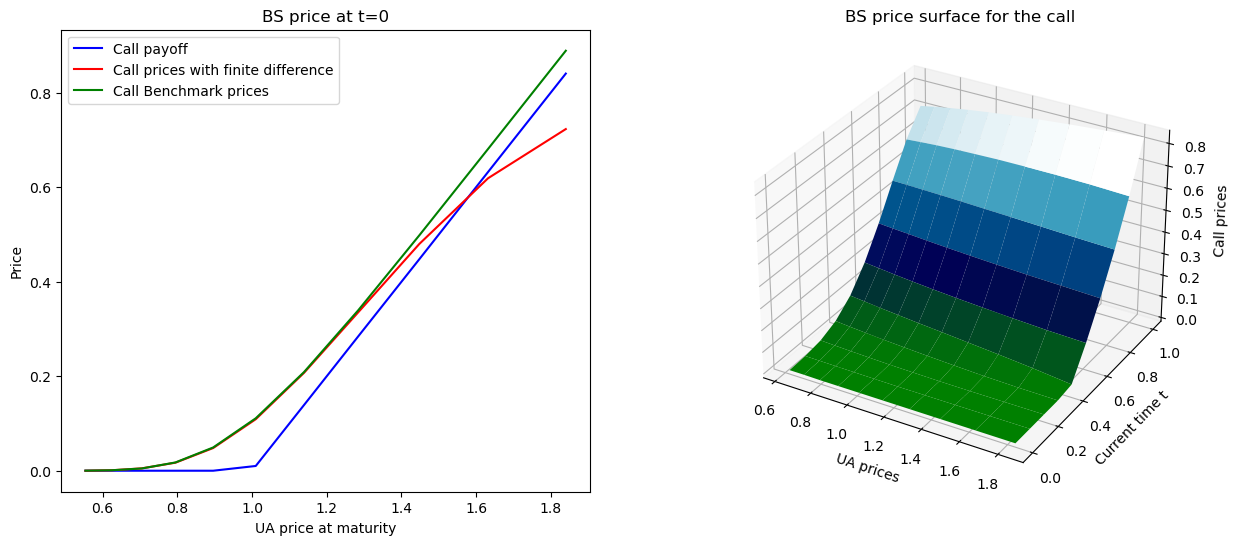

In [347]:
#plt.cla()
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

ax1.plot(Z, call_payoffs, color="blue", label="Call payoff")
ax1.plot(Z, call_values_0, color="red", label="Call prices with finite difference")
ax1.plot(Z, call_benchmark, color="green", label="Call Benchmark prices")
ax1.set_xlabel("UA price at maturity")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")
ax1.set_title("BS price at t=0")

Y1, Y2 = np.meshgrid(tau, Z[-len(tau):])      # To obtain a scare matrix
ax2.plot_surface(Y2, Y1, call_values[:,-len(tau):], cmap=cm.ocean)  # We take the len(tau) last columns
ax2.set_title("BS price surface for the call")
ax2.set_xlabel("UA prices")
ax2.set_ylabel("Current time t")
ax2.set_zlabel("Call prices")
plt.show()

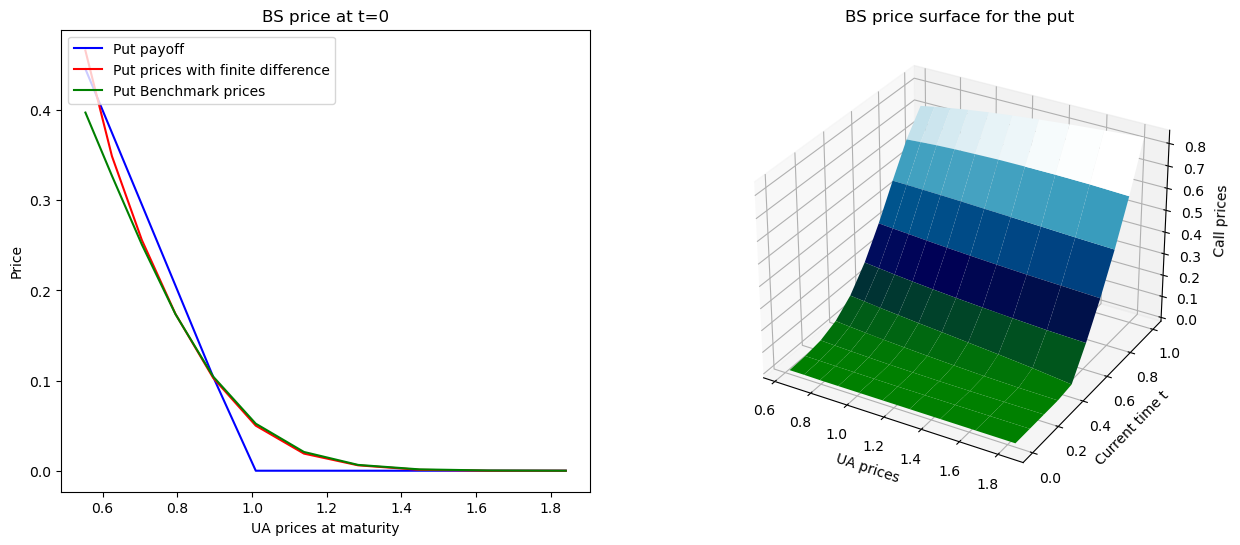

In [346]:
#plt.cla()
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

ax1.plot(Z, put_payoffs, color="blue", label="Put payoff")
ax1.plot(Z, put_values_0, color="red", label="Put prices with finite difference")
ax1.plot(Z, put_benchmark, color="green", label="Put Benchmark prices")
#ax1.set_xlim(0, 100)
#ax1.set_ylim(0, 50)
ax1.set_xlabel("UA prices at maturity")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")
ax1.set_title("BS price at t=0")

Y1, Y2 = np.meshgrid(tau, Z[-len(tau):])  # To obtain a scare matrix
ax2.plot_surface(Y2, Y1, put_values[:,-len(tau):], cmap=cm.ocean)  # We take the len(tau) last columns
ax2.set_title("BS price surface for the put")
ax2.set_xlabel("UA prices")
ax2.set_ylabel("Current time t")
ax2.set_zlabel("Call prices")
#ax2.view_init(0, -100)  # this function rotates the 3d plot
plt.show()

#### The options prices as functions of the interest rate $r$ and the current time $t$

The spot price at time t of the underlying asset under the Martingale measure $Q$ is given by:

$$
X_t = X_0 e^{(r-\dfrac{\sigma^2}{2}) t + \sigma W^{Q}_{t}} \equiv  X_0 e^{(r -\dfrac{\sigma^2}{2}) t + \sigma \sqrt{t} N}
$$

Where 
* $N$ is a standard normal random variable (with mean $0$ and variance $1$
* $W^{Q}_{t}$ Is standard brownian motion under the Martingale Measure $Q$

In [357]:
# A function that approximation the spot prices
def Xspot(x0: float, r: float, sigma: float, t: float):
    n_simulations = 100 # Number of trajectories
    np.random.seed(42)   # For reproducibility
    x = (r - sigma**2 /2) * t +  np.random.normal(0, sqrt(t), size= n_simulations)
    
    X = x0 * exp(x)
    
    return np.mean(X)

In [361]:
n = 252
r = np.linspace(0, 1, n)
t = np.linspace(0, T-0.0001, n)

times, rates = np.meshgrid(t, r)

call = np.zeros((n, n))
put = np.zeros((n, n))

for i in range(n):
    for k in range(n):
        valuation = BSMOptionsValuation(Xt = Xspot(x0 = 1, r=0.05, sigma = 0.2, t = times[i, k]), 
                                                   K = 1, T = 1, r = rates[i,k], sigma = 0.2, t = times[i, k])
        options_prices = valuation.call_put_benchmark()
        call[i, k] = options_prices[0]
        put[i, k] = options_prices[1]

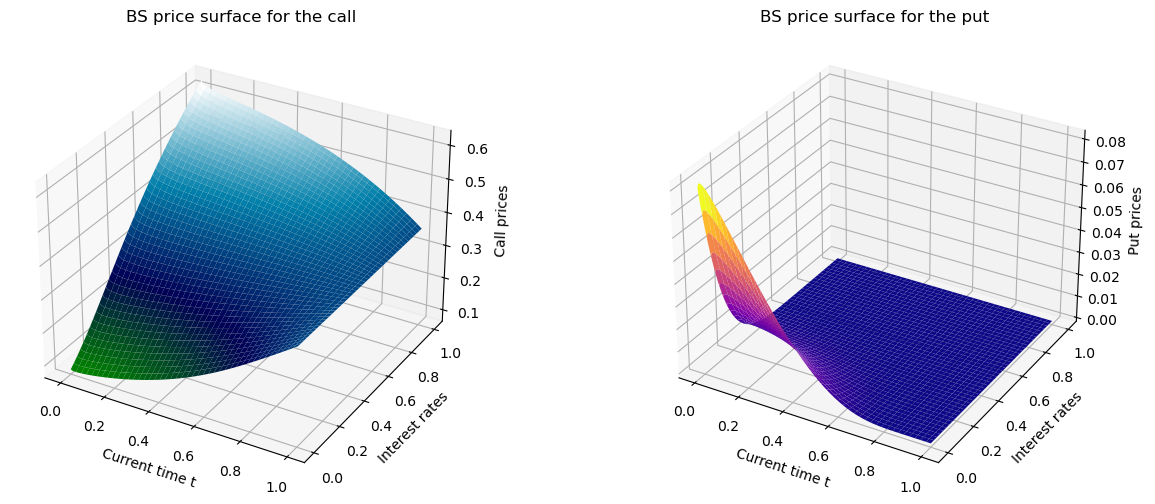

In [397]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

ax1.plot_surface(times, rates, call, cmap=cm.ocean)  # We take the len(tau) last columns
ax1.set_title("BS price surface for the call")
ax1.set_xlabel("Current time t")
ax1.set_ylabel("Interest rates")
ax1.set_zlabel("Call prices")

ax2.plot_surface(times, rates, put, cmap='plasma')  # We take the len(tau) last columns
ax2.set_title("BS price surface for the put")
ax2.set_xlabel("Current time t")
ax2.set_ylabel("Interest rates")
ax2.set_zlabel("Put prices")
plt.show()


#### Visualization on the cash-or-nothing call

In [392]:
n = 252
current_times = np.linspace(0, T-0.0001, n)

X = [Xspot(x0 = 1, r=0.05, sigma = 0.2, t = t) for t in current_times] 

times, ua_spot = np.meshgrid(current_times, X)

CNC_prices = []
CNC_delta = []
CNC_gamma = []

CNC_prices_grid = np.zeros((n, n))
CNC_delta_grid = np.zeros((n, n))
CNC_gamma_grid = np.zeros((n, n))

for i in range(n):
    valuation = BSMOptionsValuation(Xt = X[i], K = 1, T = 1, r = 0.05, sigma = 0.2, t = current_times[i])
    cnc_p, cnc_d, cnc_g = valuation.CashNothingCall()
    CNC_prices.append(cnc_p)
    CNC_delta.append(cnc_d)
    CNC_gamma.append(cnc_g)    
    for k in range(n):
        valuation = BSMOptionsValuation(Xt = ua_spot[i, k], K = 1, T = 1, r = 0.05, sigma = 0.2, t = times[i, k])
        cnc_p, cnc_d, cnc_g = valuation.CashNothingCall()
        CNC_prices_grid[i, k] = cnc_p
        CNC_delta_grid[i, k] = cnc_d
        CNC_gamma_grid[i, k] = cnc_g

##### Curves of the Cash-or-Nothing call prices, deltas and gammas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


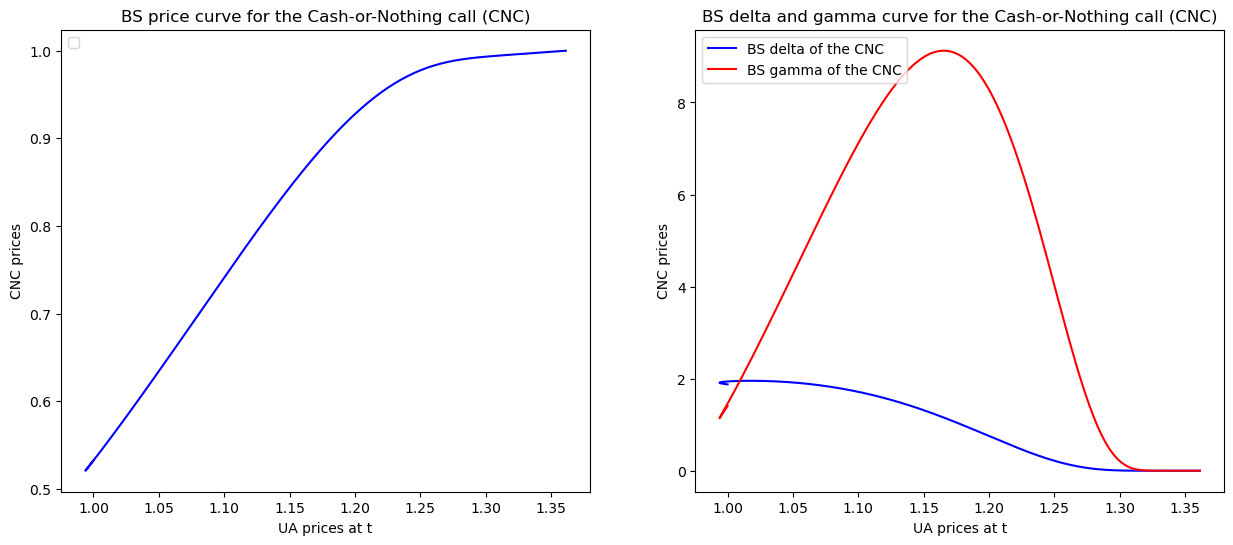

In [394]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.plot(X, CNC_prices, color="blue")
ax1.set_xlabel("UA prices at t")
ax1.set_ylabel("CNC prices")
ax1.legend(loc="upper left")
ax1.set_title("BS price curve for the Cash-or-Nothing call (CNC)")

ax2.plot(X, CNC_delta, color="blue", label="BS delta of the CNC")
ax2.plot(X, CNC_gamma, color="red", label="BS gamma of the CNC")
ax2.set_xlabel("UA prices at t")
ax2.set_ylabel("CNC prices")
ax2.legend(loc="upper left")
ax2.set_title("BS delta and gamma curve for the Cash-or-Nothing call (CNC)")

plt.show()


The cash-or-nothing call has a positive delta and a positive gamma. 
* The delta decreases as we approch maturity
* The gamma increases rapidly to reach a pick then decreases with practically the same speed to zero near maturity

##### Visualization of surfaces related to the Cash-or-nothing call

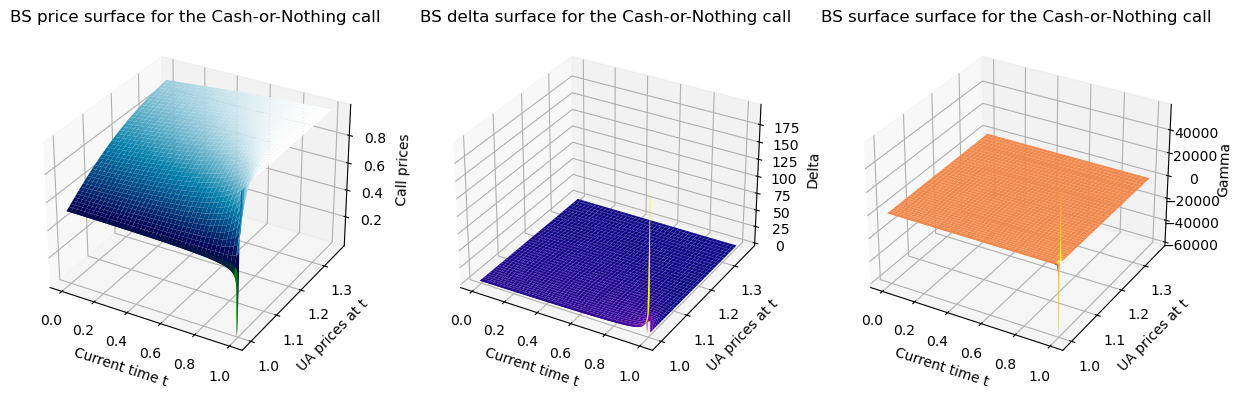

In [395]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

ax1.plot_surface(times, ua_spot, CNC_prices_grid, cmap=cm.ocean)  
ax1.set_title("BS price surface for the Cash-or-Nothing call")
ax1.set_xlabel("Current time t")
ax1.set_ylabel("UA prices at t")
ax1.set_zlabel("Call prices")

ax2.plot_surface(times, ua_spot, CNC_delta_grid, cmap='plasma')  
ax2.set_title("BS delta surface for the Cash-or-Nothing call")
ax2.set_xlabel("Current time t")
ax2.set_ylabel("UA prices at t")
ax2.set_zlabel("Delta")

ax3.plot_surface(times, ua_spot, CNC_gamma_grid, cmap='plasma')  
ax3.set_title("BS surface surface for the Cash-or-Nothing call")
ax3.set_xlabel("Current time t")
ax3.set_ylabel("UA prices at t")
ax3.set_zlabel("Gamma")

plt.show()


End of the project.

Realized by: Koudadim Olivier TRAORE